In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1. Lire l’image lena .

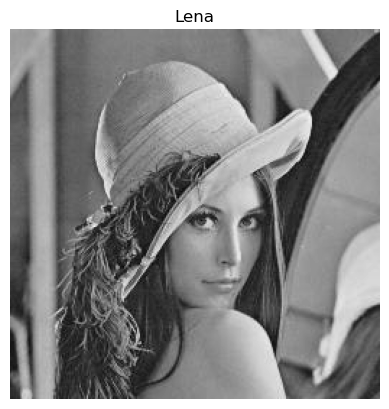

In [2]:
image = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(image, cmap='gray')
plt.title("Lena")
plt.axis('off')
plt.show()

### 2. Erosion

In [3]:
def erode(image):
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=255)
    eroded_image = np.zeros_like(image)
    for i in range(len(image)):
        for j in range(len(image[0])):
            neighborhood = padded_image[i:i+3, j:j+3]
            eroded_image[i][j] = np.min(neighborhood)
    return eroded_image

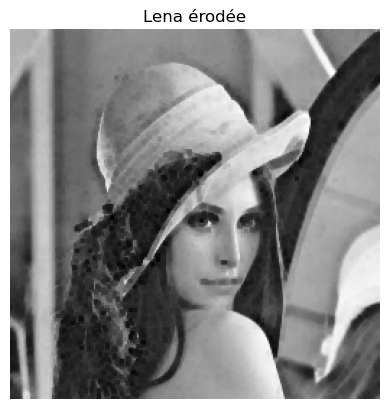

In [4]:
image_eroded = erode(image)

plt.figure()
plt.imshow(image_eroded, cmap='gray')
plt.title("Lena érodée")
plt.axis('off')
plt.show()

### 3. Dilatation

In [5]:
def dilate(image):
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=255)
    dilated_image = np.zeros_like(image)
    for i in range(len(image)):
        for j in range(len(image[0])):
            neighborhood = padded_image[i:i+3, j:j+3]
            dilated_image[i][j] = np.max(neighborhood)
    return dilated_image

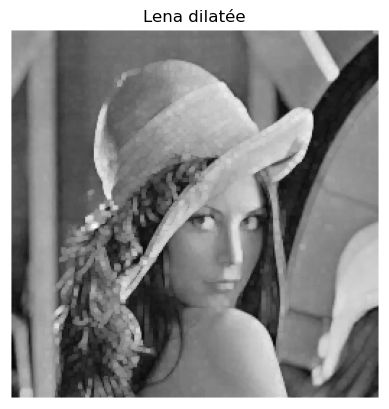

In [6]:
image_dilated = dilate(image)

plt.figure()
plt.imshow(image_dilated, cmap='gray')
plt.title("Lena dilatée")
plt.axis('off')
plt.show()

### 4. Gradianet Morphologique

In [7]:
def gradient_morphologique(image):
    eroded_image = erode(image)
    dilated_image = dilate(image)
    return dilated_image - eroded_image

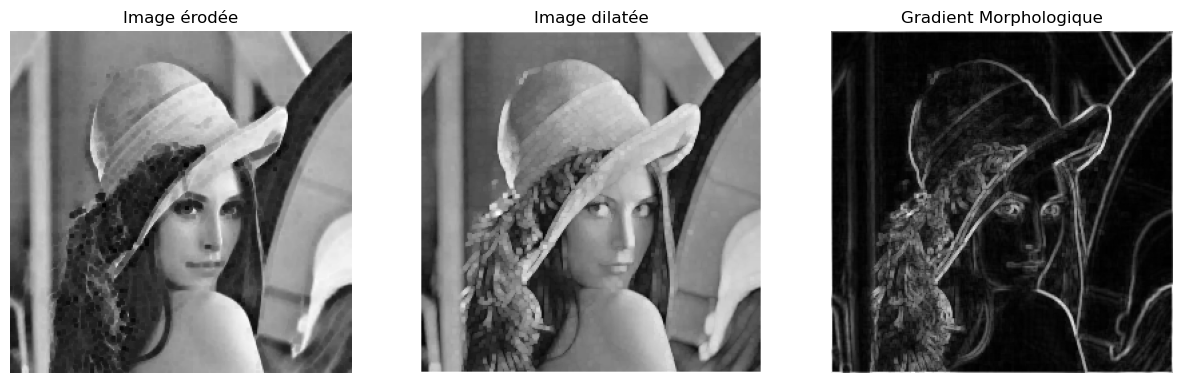

In [8]:
g_m = gradient_morphologique(image)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(image_eroded, cmap='gray')
plt.title("Image érodée")
plt.axis('off')

plt.subplot(132)
plt.imshow(image_dilated, cmap='gray')
plt.title("Image dilatée")
plt.axis('off')

plt.subplot(133)
plt.imshow(g_m, cmap='gray')
plt.title("Gradient Morphologique")
plt.axis('off')

plt.show()

### 5. Ouverture et Fermeture

In [9]:
def ouverture(image):
    return dilate(erode(image))

def fermerture(image):
    return erode(dilate(image))

(-0.5, 255.5, 255.5, -0.5)

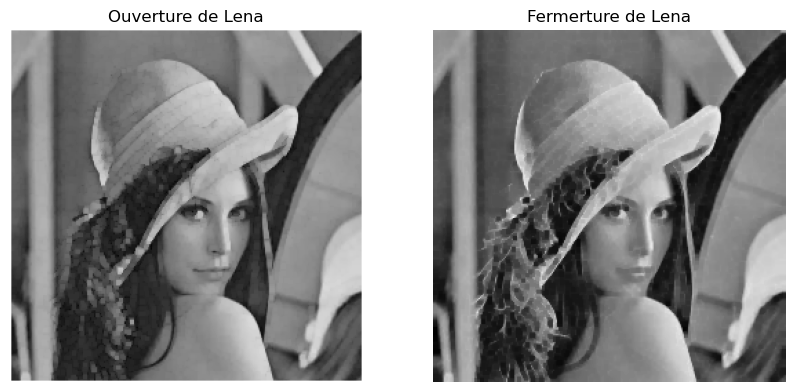

In [10]:
o = ouverture(image)
f = fermerture(image)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(o, cmap='gray')
plt.title("Ouverture de Lena")
plt.axis('off')

plt.subplot(122)
plt.imshow(f, cmap='gray')
plt.title("Fermerture de Lena")
plt.axis('off')

### 6. Lire les images

(-0.5, 366.5, 468.5, -0.5)

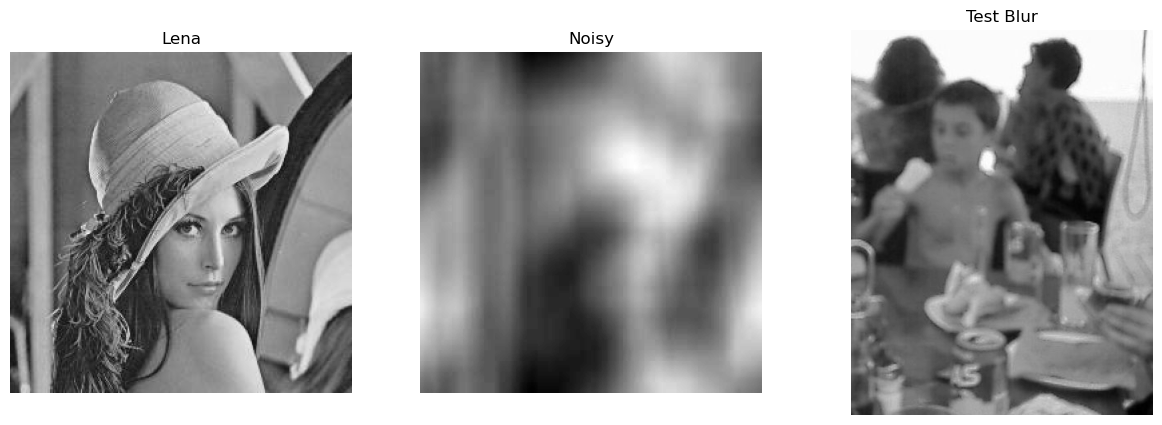

In [11]:
lena = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
noisy = cv2.imread('noisy.jpg', cv2.IMREAD_GRAYSCALE)
test_blur = cv2.imread('test_blur.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(lena, cmap='gray')
plt.title("Lena")
plt.axis('off')

plt.subplot(132)
plt.imshow(noisy, cmap='gray')
plt.title("Noisy")
plt.axis('off')

plt.subplot(133)
plt.imshow(test_blur, cmap='gray')
plt.title("Test Blur")
plt.axis('off')

### 7. Convoluer  Léna avec un filtre PB de taille 5x5. Récupérer Léna

In [12]:
from scipy.signal import convolve2d, wiener

# Wiener Deconvolution
def wiener_deconvolution(img, kernel, K=0.01):
    kernel /= np.sum(kernel)  # Normalize the kernel
    dummy = np.copy(img)
    img_fft = np.fft.fft2(img)
    kernel_fft = np.fft.fft2(kernel, s=img.shape)
    kernel_fft_conj = np.conj(kernel_fft)

    # Wiener formula
    wiener_filter = kernel_fft_conj / (kernel_fft * kernel_fft_conj + K)
    deconvolved = np.fft.ifft2(img_fft * wiener_filter)
    
    return np.abs(deconvolved)

def restore(image, L, K):
    kernel = np.zeros((L, L))
    kernel[int((L-1)/2), :] = np.ones(L)
    kernel /= L

    return wiener_deconvolution(image, kernel, K)

(-0.5, 255.5, 255.5, -0.5)

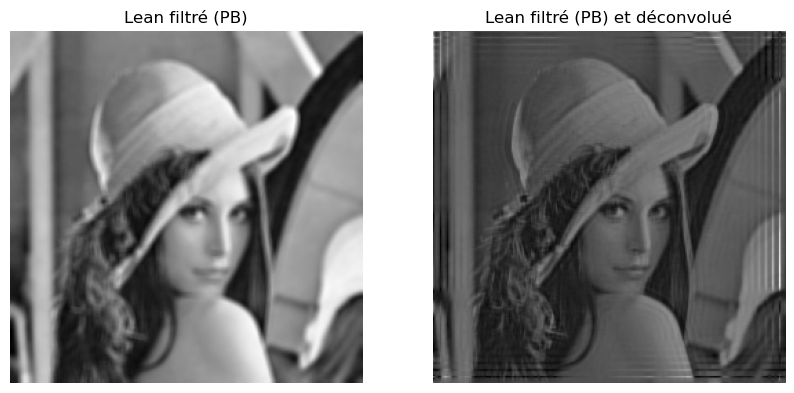

In [13]:
kernel = np.ones((5, 5), np.float32) / 25
lena_pb = cv2.filter2D(lena, -1, kernel)

# Restore the image
lena_restored = wiener_deconvolution(lena_pb, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(lena_pb, cmap='gray')
plt.title("Lean filtré (PB)")
plt.axis('off')

plt.subplot(122)
plt.imshow(lena_restored, cmap='gray')
plt.title("Lean filtré (PB) et déconvolué")
plt.axis('off')

### 8.  Ajouter un flou et un déplacement à l'image Léna. Restaurer l'image initiale

In [14]:
def motion_blur(image, L):
    kernel = np.zeros((L, L))
    kernel[int((L-1)/2), :] = np.ones(L)
    kernel /= L
    return convolve2d(image, kernel, mode='same', boundary='wrap')

def restore(image, L, K):
    kernel = np.zeros((L, L))
    kernel[int((L-1)/2), :] = np.ones(L)
    kernel /= L

    return wiener_deconvolution(image, kernel, K)

(-0.5, 255.5, 255.5, -0.5)

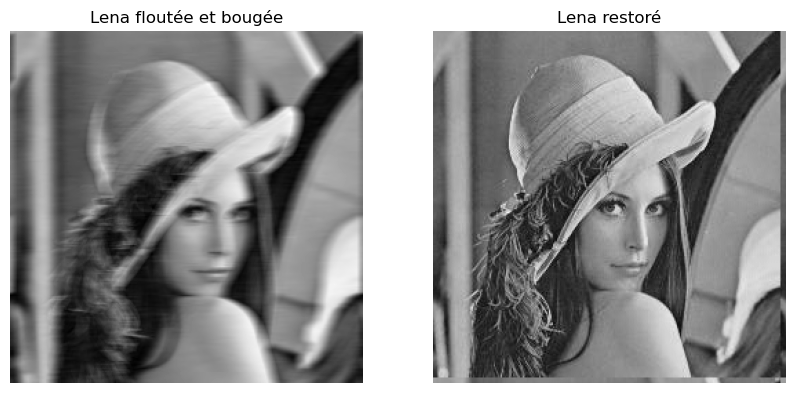

In [15]:
lena_blurred = motion_blur(lena, 10)

lena_restored = restore(lena_blurred, 10, 0.000000001)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(lena_blurred, cmap='gray')
plt.title("Lena floutée et bougée")
plt.axis('off')

plt.subplot(122)
plt.imshow(lena_restored, cmap='gray')
plt.title("Lena restoré")
plt.axis('off')

### 9. Appliquer le filtre de Lucy-Richardson sur l&#39;image test_blur. Prendre 5 itérations.

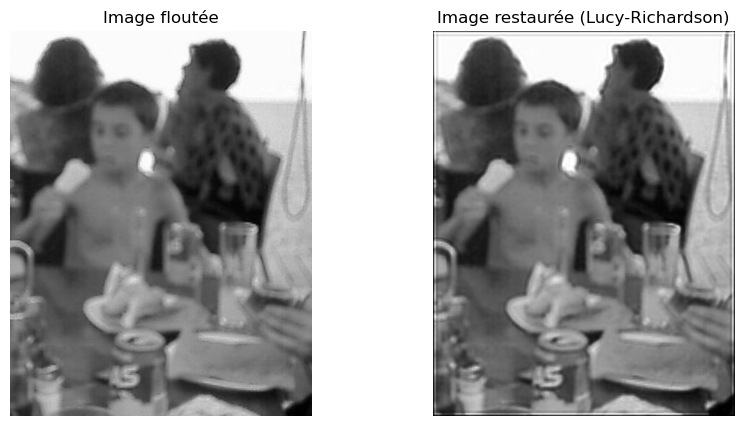

In [16]:
from skimage import img_as_float
from skimage import restoration
import matplotlib.pyplot as plt

def généré_psf(taille_kernel=3):
    return (np.ones((taille_kernel, taille_kernel)) / (taille_kernel*taille_kernel))

psf = généré_psf(5)

deconvolved = restoration.richardson_lucy(img_as_float(test_blur), psf, num_iter=5)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(test_blur, cmap='gray')
plt.title("Image floutée")
plt.axis('off')

plt.subplot(122)
plt.imshow(deconvolved, cmap='gray')
plt.title("Image restaurée (Lucy-Richardson)")
plt.axis('off')

plt.show()

### 10. Restaurer l’image de Léna à partir de l’image noisy en déterminant le filtre adéquat.

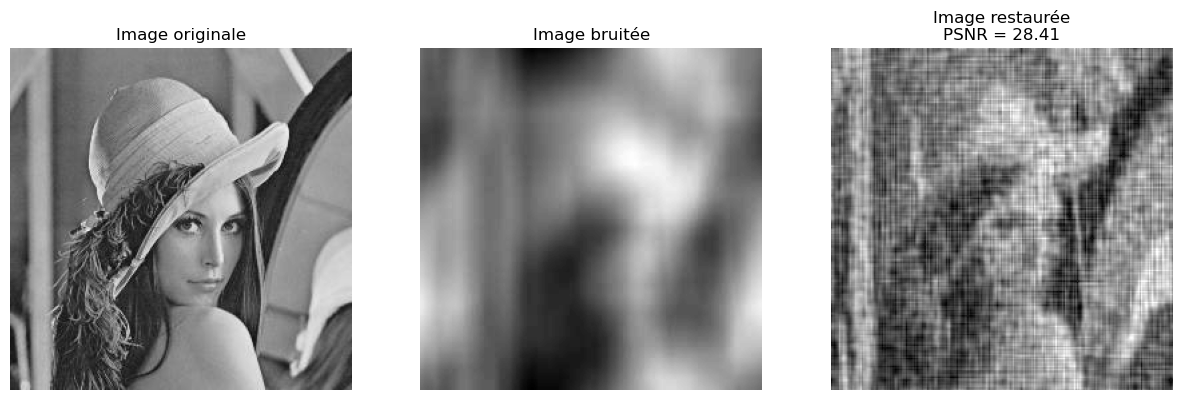

In [31]:
def psnr(original, restored):
    mse = np.mean((original - restored) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

kernel = np.ones((50, 50)) / (50 * 50) 
restored_lena = wiener_deconvolution(noisy, kernel, K=0.0001)

# Clip values to valid range and convert to uint8
restored_lena = np.clip(restored_lena, 0, 255).astype(np.uint8)

# Display results and PSNR
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(lena, cmap='gray')
plt.title("Image originale")
plt.axis('off')

plt.subplot(132)
plt.imshow(noisy, cmap='gray')
plt.title("Image bruitée")
plt.axis('off')

plt.subplot(133)
plt.imshow(restored_lena, cmap='gray')
plt.title(f"Image restaurée\nPSNR = {psnr(lena, restored_lena):.2f}")
plt.axis('off')

plt.show()

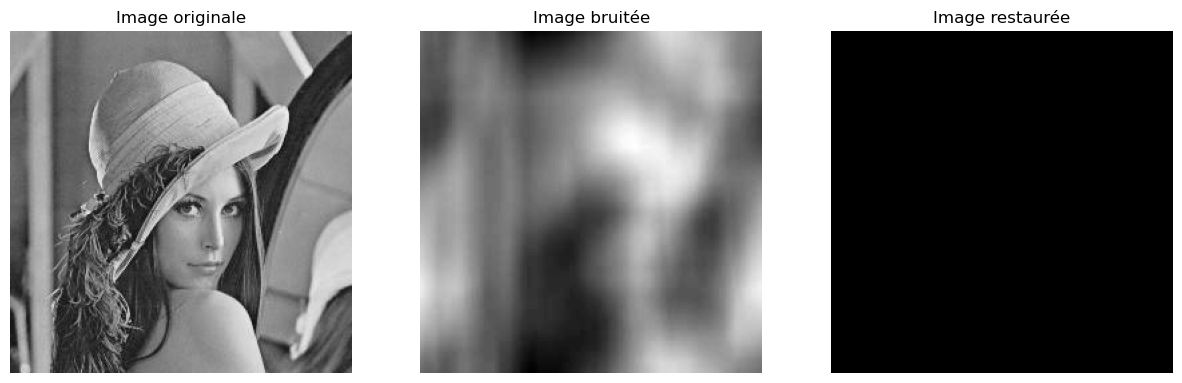

In [41]:
def projetfiltre(input_img, sbox, filter_type, sigma, alpha):
    # Convert to float if needed
    f = input_img.astype(np.float64) / 255.0
    
    # Get image dimensions
    m, n = f.shape
    
    # Create convolution kernel
    box = np.zeros((m, n))
    if filter_type == 'horizontal':
        box[0, :sbox] = 1
    elif filter_type == 'vertical':
        box[:sbox, 0] = 1
    elif filter_type == 'square':
        box[:sbox, :sbox] = 1
    
    # Normalize the kernel
    box = box / np.sum(box)
    
    # Perform convolution in frequency domain
    Ff = np.fft.fft2(f)
    Hh = np.fft.fft2(box)  # Remove shape parameters
    Cc = Ff * Hh
    c = np.real(np.fft.ifft2(Cc))
    
    # Add noise
    sigma = np.sqrt(sigma)
    noisy = c + sigma * np.random.randn(*c.shape)
    noisy = np.clip(noisy, 0, 1)
    
    # Convert to frequency domain
    Gg = np.fft.fft2(noisy)
    
    # Inverse filter with regularization
    mask = np.abs(Hh) < 1e-10
    Hh_safe = np.where(mask, 1e-10, Hh)
    Ffinv = Gg / Hh_safe
    finv = np.abs(np.fft.ifft2(Ffinv))
    
    # Convert back to uint8
    finv = np.clip(finv * 255, 0, 255).astype(np.uint8)
    
    return finv

# Test the function
restored_lena = projetfiltre(lena_pb, 4, 'vertical', 0.01, 0.5)

# Display results and PSNR
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(lena, cmap='gray')
plt.title("Image originale")
plt.axis('off')

plt.subplot(132)
plt.imshow(noisy, cmap='gray')
plt.title("Image bruitée")
plt.axis('off')

plt.subplot(133)
plt.imshow(restored_lena, cmap='gray')
plt.title("Image restaurée")
plt.axis('off')

plt.show()

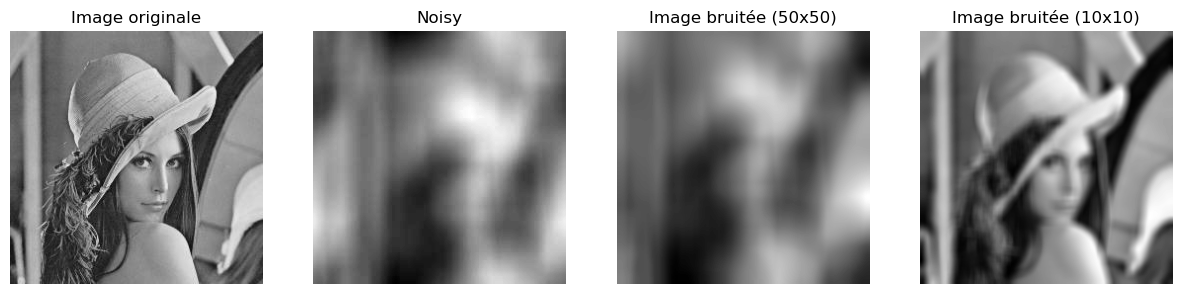

In [18]:
kernel = np.ones((50, 50)) / (50 * 50)
noised = cv2.filter2D(lena, -1, kernel)
gaussian_noise = np.random.normal(0, 0.2, noised.shape).astype(np.uint8)
noised = cv2.add(noised, gaussian_noise)

kernel = np.ones((10, 10)) / (10 * 10)
noised_2 = cv2.filter2D(lena, -1, kernel)
noised_2 = cv2.add(noised_2, gaussian_noise)

plt.figure(figsize=(15, 5))

plt.subplot(141)
plt.imshow(lena, cmap='gray')
plt.title("Image originale")
plt.axis('off')

plt.subplot(142)
plt.imshow(noisy, cmap='gray')
plt.title("Noisy")
plt.axis('off')

plt.subplot(143)
plt.imshow(noised, cmap='gray')
plt.title("Image bruitée (50x50)")
plt.axis('off')

plt.subplot(144)
plt.imshow(noised_2, cmap='gray')
plt.title("Image bruitée (10x10)")
plt.axis('off')

plt.show()

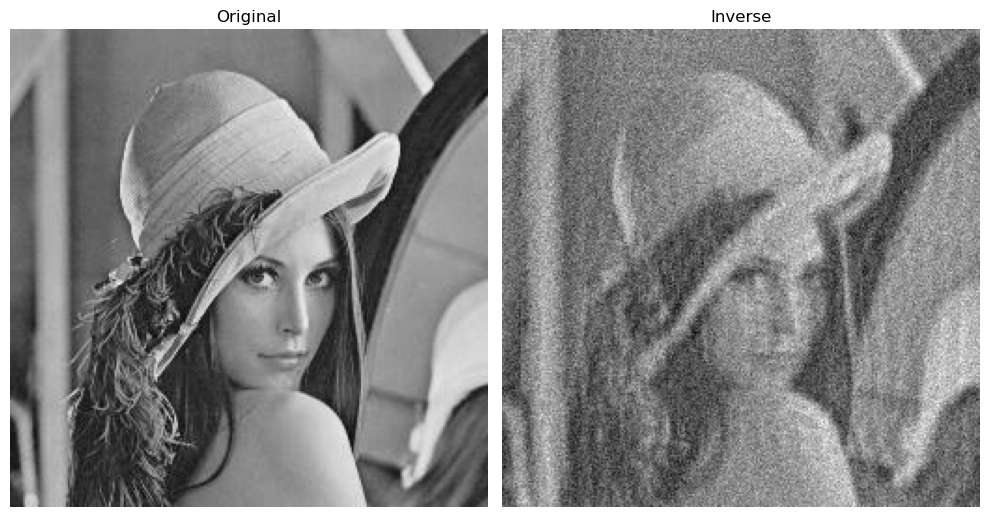

In [77]:
import numpy as np
import cv2
from scipy.fft import fft2, ifft2
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

def calculate_psnr(im1, im2):
    mse = np.mean((im1 - im2) ** 2)
    return 20 * np.log10(1 / np.sqrt(mse))

# Paramètres
input_img = './lena.jpg'
sbox = 10
type_filtre = 'carre'  
sigma = 0.0001  
alpha = 0.5  

# Ajouter bruit gaussien
noisy = c + np.random.normal(0, np.sqrt(sigma), c.shape)
noisy = np.clip(noisy, 0, 1)


# Charger l'image
f = cv2.imread(input_img, cv2.IMREAD_GRAYSCALE)
f = f.astype(np.float64) / 255.0
m, n = f.shape

# Construire le filtre h
h = np.zeros((m, n))
if type_filtre == 'horizontal':
    h[0, :sbox] = 1
elif type_filtre == 'vertical':
    h[:sbox, 0] = 1
elif type_filtre == 'carre':
    h[:sbox, :sbox] = 1
h /= np.sum(h)

# Convolution
Ff = fft2(f)
Hh = fft2(h)
Cc = Ff * Hh
c = np.real(ifft2(Cc))



# Restaurer avec filtre inverse
Gg = fft2(noisy)
Hh_abs = np.abs(Hh)
Hh_threshold = np.where(Hh_abs < 1e-1, 1e-1, Hh)
Ffinv = Gg / Hh_threshold
finv = np.real(ifft2(Ffinv))


# Affichage
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.imshow(f, cmap='gray')
plt.title('Original')
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(finv, cmap='gray')
plt.title(f'Inverse')
plt.axis('off')




plt.tight_layout()
plt.show()

### 11. Restaurer l’image de 02av avec une méthode intelligente.

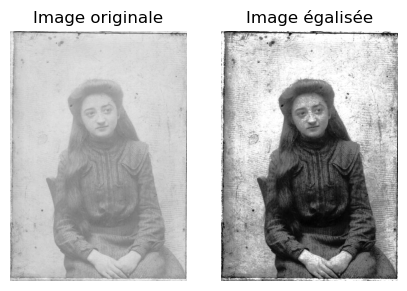

In [66]:
av = cv2.imread('02av.jpg', cv2.IMREAD_GRAYSCALE)

av_yuv = cv2.cvtColor(av, cv2.IMREAD_COLOR)
av_yuv[:,:,0] = cv2.equalizeHist(av_yuv[:,:,0])
av_eq = cv2.cvtColor(av_yuv, cv2.COLOR_YUV2BGR)

av_eq = cv2.cvtColor(av_eq, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(5, 10))
plt.subplot(121)
plt.imshow(av, cmap="gray")
plt.title("Image originale")
plt.axis('off')

plt.subplot(122)
plt.imshow(av_eq, cmap="gray")
plt.title("Image égalisée")
plt.axis('off')

plt.show()

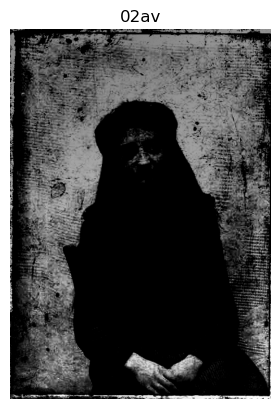

In [82]:
def low_pass_filter(shape, cutoff=-1):
    if cutoff == -1:
        cutoff = shape
    filter = np.zeros(shape)
    center_x = shape[0] / 2
    center_y = shape[1] / 2
    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    dist_from_center = np.sqrt((x - center_y)**2 + (y - center_x)**2)
    radius = min(cutoff) / 2
    filter[dist_from_center <= radius] = 1

    return filter/np.sum(filter)

def high_pass_filter(shape, cutoff=-1):
    Mid = np.zeros(shape)
    Mid[shape[0]//2, shape[1]//2] = 1
    return  Mid - low_pass_filter(shape, cutoff)

shape = (5, 5)

contour = high_pass_filter((1000, 1000))

result = cv2.filter2D(av_eq, -1, contour)

plt.figure()
plt.imshow(result, cmap='gray')
plt.title("02av")
plt.axis('off')
plt.show()

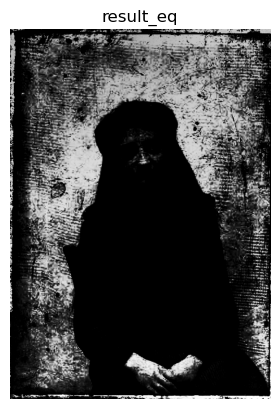

In [83]:
result_yuv = cv2.cvtColor(result, cv2.IMREAD_COLOR)
result_yuv[:,:,0] = cv2.equalizeHist(result_yuv[:,:,0])
result_eq = cv2.cvtColor(result_yuv, cv2.COLOR_YUV2BGR)

result_eq = cv2.cvtColor(result_eq, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(result_eq, cmap='gray')
plt.title("result_eq")
plt.axis('off')
plt.show()

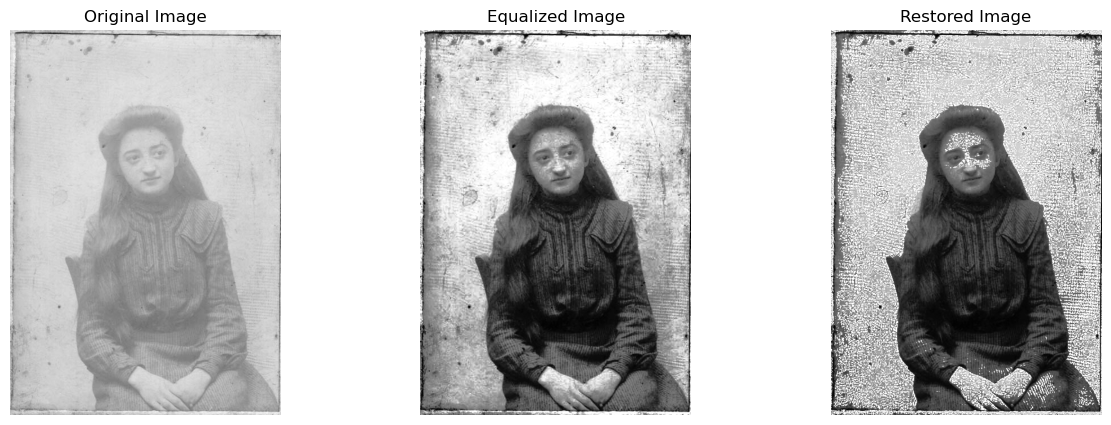

In [95]:
def restore_pixel_with_distance(av_eq, threshold_dist=150, threshold_diff=30):
    height, width = av_eq.shape
    center_y, center_x = height // 2, width // 2
    result = av_eq.copy()
    
    # Calculate distance from center for each pixel
    y_coords, x_coords = np.ogrid[:height, :width]
    distances = np.sqrt((y_coords - center_y)**2 + (x_coords - center_x)**2)
    
    # Create padded image for neighborhood operations
    padded = np.pad(result_eq, 1, mode='edge')
    
    for y in range(height):
        for x in range(width):
            if distances[y, x] > threshold_dist:
                # Get 3x3 neighborhood
                neighborhood = padded[y:y+3, x:x+3]
                center_val = result_eq[y, x]
                
                # Calculate differences with neighbors
                diff = np.abs(neighborhood - center_val)
                
                # If pixel differs too much from its neighbors, consider it noise
                if np.mean(diff) > threshold_diff:
                    result[y, x] = 255  # Set to white

    return result

# Apply restoration
restored_av = restore_pixel_with_distance(av_eq, threshold_dist=100, threshold_diff=100)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(av, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(av_eq, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(restored_av, cmap='gray')
plt.title('Restored Image')
plt.axis('off')

plt.show()